In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

df = pd.read_json('../data/database-10-12.json')

#### Füge ein neues Feature hinzu: Anzahl Wörter, Anzahl Zeichen

In [2]:
df['content_length'] = df['content'].str.len()
df['content_words'] = df['content'].str.split().map(len)

## Gruppiere die Artikel nach: Ressort 
#### Aggregiere pro Ressort die Durchschnittsanzahl Zeichen/Wörter

In [3]:
df = df.groupby(['ressort']).agg({"content_length": "mean", "content_words": "mean"})

#### Sortiere die Artikel nach: Anzahl Zeichen (absteigend)

In [8]:
df = df.sort_values("content_length", ascending=False)

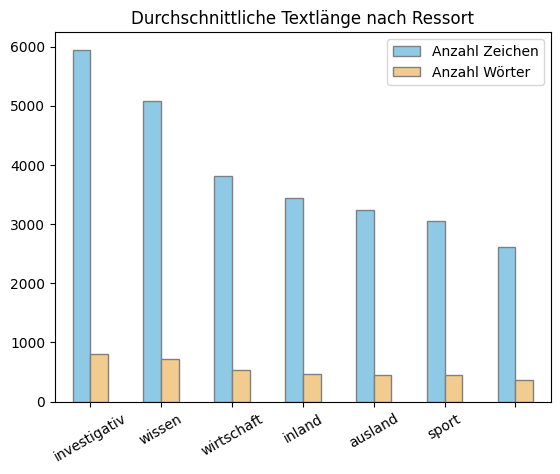

In [9]:
fig, ax1 = plt.subplots()

df.plot(ax=ax1, kind="bar", y=['content_length', 'content_words'], color=["#8ecae6", "#f2cc8f"], edgecolor=["grey"], rot=30)

ax1.set_title('Durchschnittliche Textlänge nach Ressort')
ax1.legend(["Anzahl Zeichen", "Anzahl Wörter"])
ax1.xaxis.label.set_visible(False)

ax1.get_figure().savefig('figures/bar-length-ressort.png', bbox_inches="tight")

plt.show()